# 📊 Aula de Distribuição de Frequência com Python

## 📌 O que é uma Distribuição de Frequência?
A distribuição de frequência é uma forma de organizar dados, mostrando quantas vezes cada valor ocorre em um conjunto de dados. Ela pode ser representada de duas formas principais:

1. **Frequência Simples:** Conta a ocorrência de cada valor único.
2. **Frequência com Classes:** Agrupa os valores em intervalos (bins).

No **Python**, podemos criar tabelas de distribuição de frequência utilizando a biblioteca **pandas**.


A utilização de ferramentas computacionais surgem com objetivo facilitar o processamento e automatizar processos onerosos.

## Importando os dados

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

In [ ]:
# Importando o arquivo csv com os dados do questionário
df = pd.read_csv('https://raw.githubusercontent.com/luiscarlosjunior/aulas-graduacao/refs/heads/master/data-science/analise-dados/datasets/csv/questionario.csv', sep=';')
# head da uma visão das primeiras 5 linhas
df.head()

,idade,altura,tempo_chegar_faculdade,data_aniversario,numero_aleatorio
0,41,1.80,90,25/09/1982,17
1,41,1.81,40,22/10/1983,7
2,38,1.79,50,15/06/1986,40
3,36,1.62,60,29/05/1988,10
4,31,1.65,35,28/08/1993,444


In [ ]:
# Apresenta as colunas que há no arquivo
df.columns

Index(['idade', 'altura', 'tempo_chegar_faculdade', 'data_aniversario',
       'numero_aleatorio'],
      dtype='object')

In [ ]:
# Gera estatística descritiva com as informações básicas somente da coluna IDADE
df['idade'].describe()

,idade
count,71.000000
mean,22.253521
std,5.153967
min,17.000000
25%,19.000000
50%,21.000000
75%,23.000000
max,41.000000


## 📊 Criando uma Tabela de Frequência Simples
Se quisermos contar quantas vezes cada valor aparece em uma coluna específica, podemos usar:

In [ ]:
# Criando tabela de frequência simples
tabela_freq = df['idade'].value_counts().sort_index()

# Exibir a tabela
print(tabela_freq)

idade
17     1
18    11
19    12
20     8
21    12
22     4
23     7
24     3
25     2
26     1
27     2
28     2
31     2
36     1
38     1
41     2
Name: count, dtype: int64


## 📊 Criando uma Tabela de Frequência com Classes (Intervalos)
Se os dados forem muito dispersos, podemos agrupá-los em intervalos (bins):

In [ ]:
import numpy as np
import pandas as pd

# Nome da coluna a ser analisada
coluna = 'idade'

# Definir automaticamente os intervalos usando numpy
num_classes = 5  # Número de classes (ajuste conforme necessário)
bins = np.histogram_bin_edges(df[coluna], bins=num_classes)

# Criar rótulos automaticamente
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

# Criar a tabela de frequência agrupada
df['Classe'] = pd.cut(df[coluna], bins=bins, labels=labels, right=False)

# Calcular as colunas da distribuição de frequência
tabela_freq = df['Classe'].value_counts().sort_index().reset_index()
tabela_freq.columns = ['Classe', 'f']  # f = Frequência Absoluta
tabela_freq['F'] = tabela_freq['f'].cumsum()  # Frequência Acumulada
tabela_freq['fr'] = tabela_freq['f'] / tabela_freq['f'].sum()  # Frequência Relativa
tabela_freq['fp (%)'] = tabela_freq['fr'] * 100  # Frequência Percentual

# Exibir a tabela
print(tabela_freq)


  Classe   f   F        fr     fp (%)
0  10-19  20  20  0.204082  20.408163
1  19-29  19  39  0.193878  19.387755
2  29-39  26  65  0.265306  26.530612
3  39-49  15  80  0.153061  15.306122
4  49-59  18  98  0.183673  18.367347


## 📈 Criando um Gráfico de Frequência
Para visualizar melhor a distribuição, podemos criar um gráfico de barras:

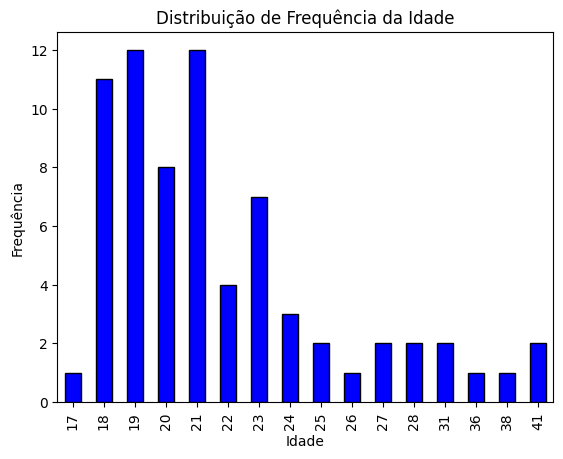

In [ ]:
import matplotlib.pyplot as plt

# Criar gráfico de barras
tabela_freq.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência da Idade')
plt.show()


# 📈 Analisando datas

## 📌 Introdução
Datas são comuns em datasets e podem ser analisadas para identificar padrões temporais. O **pandas** oferece suporte poderoso para manipulação de datas.


## 📂 1. Carregar e Converter Datas no Pandas
Quando um dataset contém colunas de **datas**, precisamos convertê-las para o formato correto.


In [ ]:
# Importando a biblioteca pandas
import pandas as pd

In [ ]:
# Importando o arquivo csv com os dados do questionário
df = pd.read_csv('https://raw.githubusercontent.com/luiscarlosjunior/aulas-graduacao/refs/heads/master/data-science/analise-dados/datasets/csv/questionario.csv', sep=';')
# head da uma visão das primeiras 5 linhas
df.head()

,idade,altura,tempo_chegar_faculdade,data_aniversario,numero_aleatorio
0,41,1.80,90,25/09/1982,17
1,41,1.81,40,22/10/1983,7
2,38,1.79,50,15/06/1986,40
3,36,1.62,60,29/05/1988,10
4,31,1.65,35,28/08/1993,444


In [ ]:
# Apresenta as colunas que há no arquivo
df.columns

Index(['idade', 'altura', 'tempo_chegar_faculdade', 'data_aniversario',
       'numero_aleatorio'],
      dtype='object')

In [ ]:
# Converter a coluna de datas (substitua 'data' pelo nome correto da coluna)
try:
  df['data'] = pd.to_datetime(df['data_aniversario'])
  # Verificar o tipo da coluna
except:
  print('A coluna não existe')
df['data'].dtypes

<ipython-input-11-f31a9d17d61e>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data'] = pd.to_datetime(df['data_aniversario'])


dtype('<M8[ns]')

## 📆 2. Extraindo Informações de Datas
Podemos decompor datas em ano, mês, dia, dia da semana, etc.

In [ ]:
# Criando novas colunas com ano, mês e dia
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df['dia'] = df['data'].dt.day
df['dia_semana'] = df['data'].dt.dayofweek
df['mes_nome'] = df['data'].dt.month_name()
df['dia_da_semana'] = df['data'].dt.day_name()

# Exibir algumas linhas
df.head()


,idade,altura,tempo_chegar_faculdade,data_aniversario,numero_aleatorio,data,ano,mes,dia,dia_semana,mes_nome,dia_da_semana
0,41,1.80,90,25/09/1982,17,1982-09-25,1982,9,25,5,September,Saturday
1,41,1.81,40,22/10/1983,7,1983-10-22,1983,10,22,5,October,Saturday
2,38,1.79,50,15/06/1986,40,1986-06-15,1986,6,15,6,June,Sunday
3,36,1.62,60,29/05/1988,10,1988-05-29,1988,5,29,6,May,Sunday
4,31,1.65,35,28/08/1993,444,1993-08-28,1993,8,28,5,August,Saturday


## 📈 3. Filtrando Dados por Períodos
Podemos filtrar registros por intervalos de datas.

Exemplo: Selecionar registros de 2025

In [ ]:
df_2023 = df[df['data'].dt.year == 2025]
df_2023.head()


,idade,altura,tempo_chegar_faculdade,data_aniversario,numero_aleatorio,data,ano,mes,dia,dia_semana,mes_nome,dia_da_semana
66,23,1.75,70,16/01/2025,8,2025-01-16,2025,1,16,3,January,Thursday
67,19,1.73,40,22/02/2025,14,2025-02-22,2025,2,22,5,February,Saturday
68,24,1.60,40,20/03/2025,12,2025-03-20,2025,3,20,3,March,Thursday
69,28,1.75,60,07/05/2025,7,2025-05-07,2025,5,7,2,May,Wednesday
70,19,1.77,45,07/12/2025,23,2025-12-07,2025,12,7,6,December,Sunday


In [ ]:
# Exemplo: Selecionar registros entre janeiro e março de 2022
df_periodo = df[(df['data'] >= '2000-01-01') & (df['data'] <= '2005-03-31')]
df_periodo.head()

,idade,altura,tempo_chegar_faculdade,data_aniversario,numero_aleatorio,data,ano,mes,dia,dia_semana,mes_nome,dia_da_semana
12,24,1.71,40,09/03/2000,11,2000-03-09,2000,3,9,3,March,Thursday
13,24,1.80,70,22/04/2000,22,2000-04-22,2000,4,22,5,April,Saturday
14,23,1.70,40,19/07/2001,7,2001-07-19,2001,7,19,3,July,Thursday
15,23,1.72,50,09/08/2001,10,2001-08-09,2001,8,9,3,August,Thursday
16,23,1.65,40,10/10/2001,8,2001-10-10,2001,10,10,2,October,Wednesday


## ⏳ 4. Cálculos com Datas
Podemos calcular diferenças entre datas para medir tempo decorrido.

In [ ]:
# Criar uma nova coluna com a diferença entre datas
df['dias_desde_inicio'] = (df['data'] - df['data'].min()).dt.days

df.head()


,idade,altura,tempo_chegar_faculdade,data_aniversario,numero_aleatorio,data,ano,mes,dia,dia_semana,mes_nome,dia_da_semana,dias_desde_inicio
0,41,1.80,90,25/09/1982,17,1982-09-25,1982,9,25,5,September,Saturday,0
1,41,1.81,40,22/10/1983,7,1983-10-22,1983,10,22,5,October,Saturday,392
2,38,1.79,50,15/06/1986,40,1986-06-15,1986,6,15,6,June,Sunday,1359
3,36,1.62,60,29/05/1988,10,1988-05-29,1988,5,29,6,May,Sunday,2073
4,31,1.65,35,28/08/1993,444,1993-08-28,1993,8,28,5,August,Saturday,3990


## 📊 5. Contando Ocorrências por Período
Podemos contar quantos registros ocorreram em cada ano, mês ou dia.

Número de registros por ano

In [ ]:
df['ano'].value_counts().sort_index()

,count
ano,
1982,1
1983,1
1986,1
1988,1
1993,1
1994,1
1996,1
1997,1
1998,1


In [ ]:
# Número de registros por mês
df.groupby('mes').size()

,0
mes,
1,7
2,9
3,5
4,4
5,10
6,3
7,4
8,5
9,4


## 📅 6. Criando Séries Temporais
Podemos agrupar registros e criar séries temporais.

In [ ]:
# Contar registros por mês
serie_temporal = df.resample('M', on='data').size()

# Exibir os primeiros valores
print(serie_temporal.head())


data
1982-09-30    1
1982-10-31    0
1982-11-30    0
1982-12-31    0
1983-01-31    0
Freq: ME, dtype: int64


<ipython-input-18-97ed365e6394>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_temporal = df.resample('M', on='data').size()


## 📉 7. Criando Gráficos de Séries Temporais
Para visualizar tendências ao longo do tempo, usamos matplotlib.

### 7.1 Séries temporais

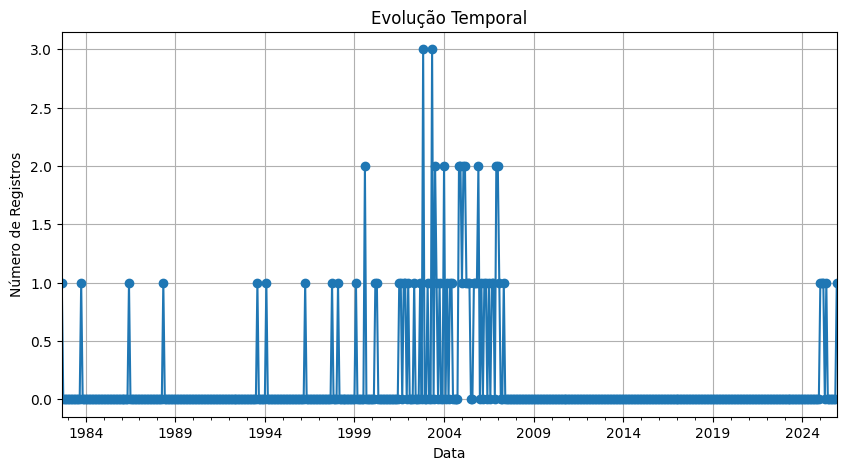

In [ ]:
import matplotlib.pyplot as plt

# Criar gráfico de séries temporais
serie_temporal.plot(figsize=(10,5), marker='o', linestyle='-')
plt.xlabel("Data")
plt.ylabel("Número de Registros")
plt.title("Evolução Temporal")
plt.grid()
plt.show()


### 7.2 Histograma da distribuição de datas

Podemos usar um histograma para visualizar a distribuição das datas no dataset.

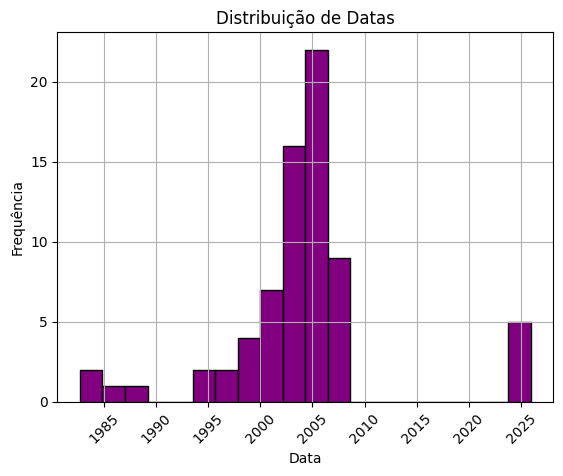

In [ ]:
df['data'].hist(bins=20, color='purple', edgecolor='black')
plt.xlabel("Data")
plt.ylabel("Frequência")
plt.title("Distribuição de Datas")
plt.xticks(rotation=45)
plt.show()


### 7.3. Gráfico de Pizza para Distribuição Mensal
Podemos visualizar a distribuição dos registros ao longo dos meses em um gráfico de pizza.

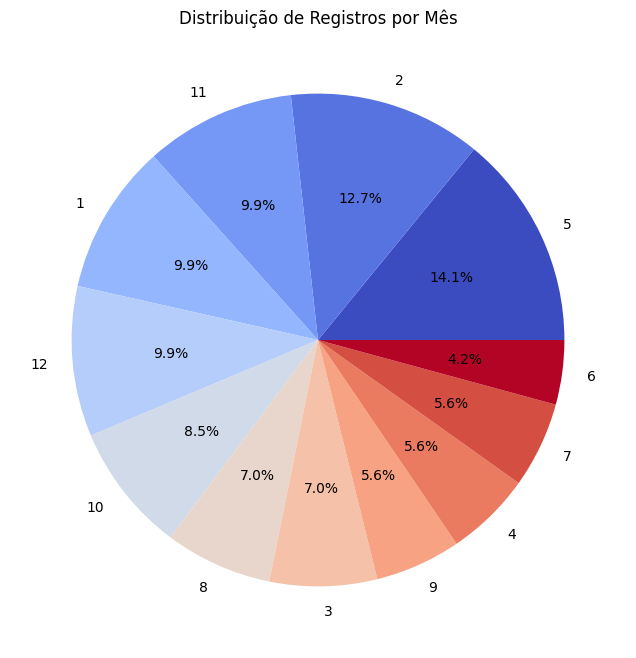

In [ ]:
df['mes'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), colormap="coolwarm")
plt.title("Distribuição de Registros por Mês")
plt.ylabel("")
plt.show()


### 7.4. Boxplot para Identificar Outliers Temporais
O boxplot mostra possíveis outliers nas datas.

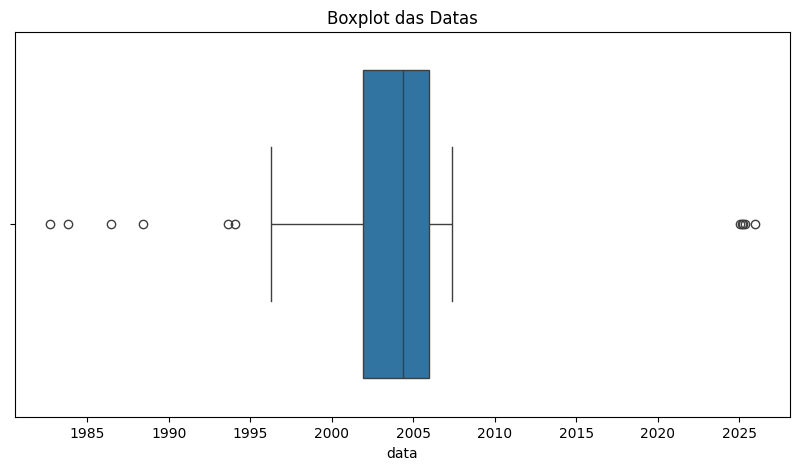

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df['data'])
plt.title("Boxplot das Datas")
plt.show()
